In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

In [3]:
df = pd.DataFrame({'Data Point':[1,2,3,4,5,6,7,8],\
                  'Valve Position%':[2.0,4.0,6.0,12.0,20.0,25.0,35.0,50.0],\
                  'Stagnation Pressure[psia]':[16.22,18.89,20.82,27.85,36.56,42.30,54.48,70.74],\
                  'Load Cell[Lbf]':[0.072,0.214,0.306,0.601,0.947,1.171,1.649,2.300],'Schlieren File Name':\
                   ['lab3-1','lab3-2','lab3-3','lab3-4','lab3-5','lab3-6','lab3-7','lab3-8']})

In [4]:
df=df.set_index(['Data Point'])

In [5]:
df['Stagnation Pressure[Pa]']=df['Stagnation Pressure[psia]']*6894.76 #convert psi to pa
df['Load Cell[N]']=df['Load Cell[Lbf]']*4.44822
df = df.drop(('Stagnation Pressure[psia]'),axis=1)
df = df.drop(('Load Cell[Lbf]'),axis=1)

In [6]:
df['Absolute Static Pressure[Pa]']=14.93*6894.76*np.ones(len(df['Stagnation Pressure[Pa]']))

In [7]:
df = df.round(3)
df

,Valve Position%,Schlieren File Name,Stagnation Pressure[Pa],Load Cell[N],Absolute Static Pressure[Pa]
Data Point,,,,,
1,2.0,lab3-1,111833.007,0.320,102938.767
2,4.0,lab3-2,130242.016,0.952,102938.767
3,6.0,lab3-3,143548.903,1.361,102938.767
4,12.0,lab3-4,192019.066,2.673,102938.767
5,20.0,lab3-5,252072.426,4.212,102938.767
6,25.0,lab3-6,291648.348,5.209,102938.767
7,35.0,lab3-7,375626.525,7.335,102938.767
8,50.0,lab3-8,487735.322,10.231,102938.767


In [8]:
table1 = df.to_excel('table1.xlsx')

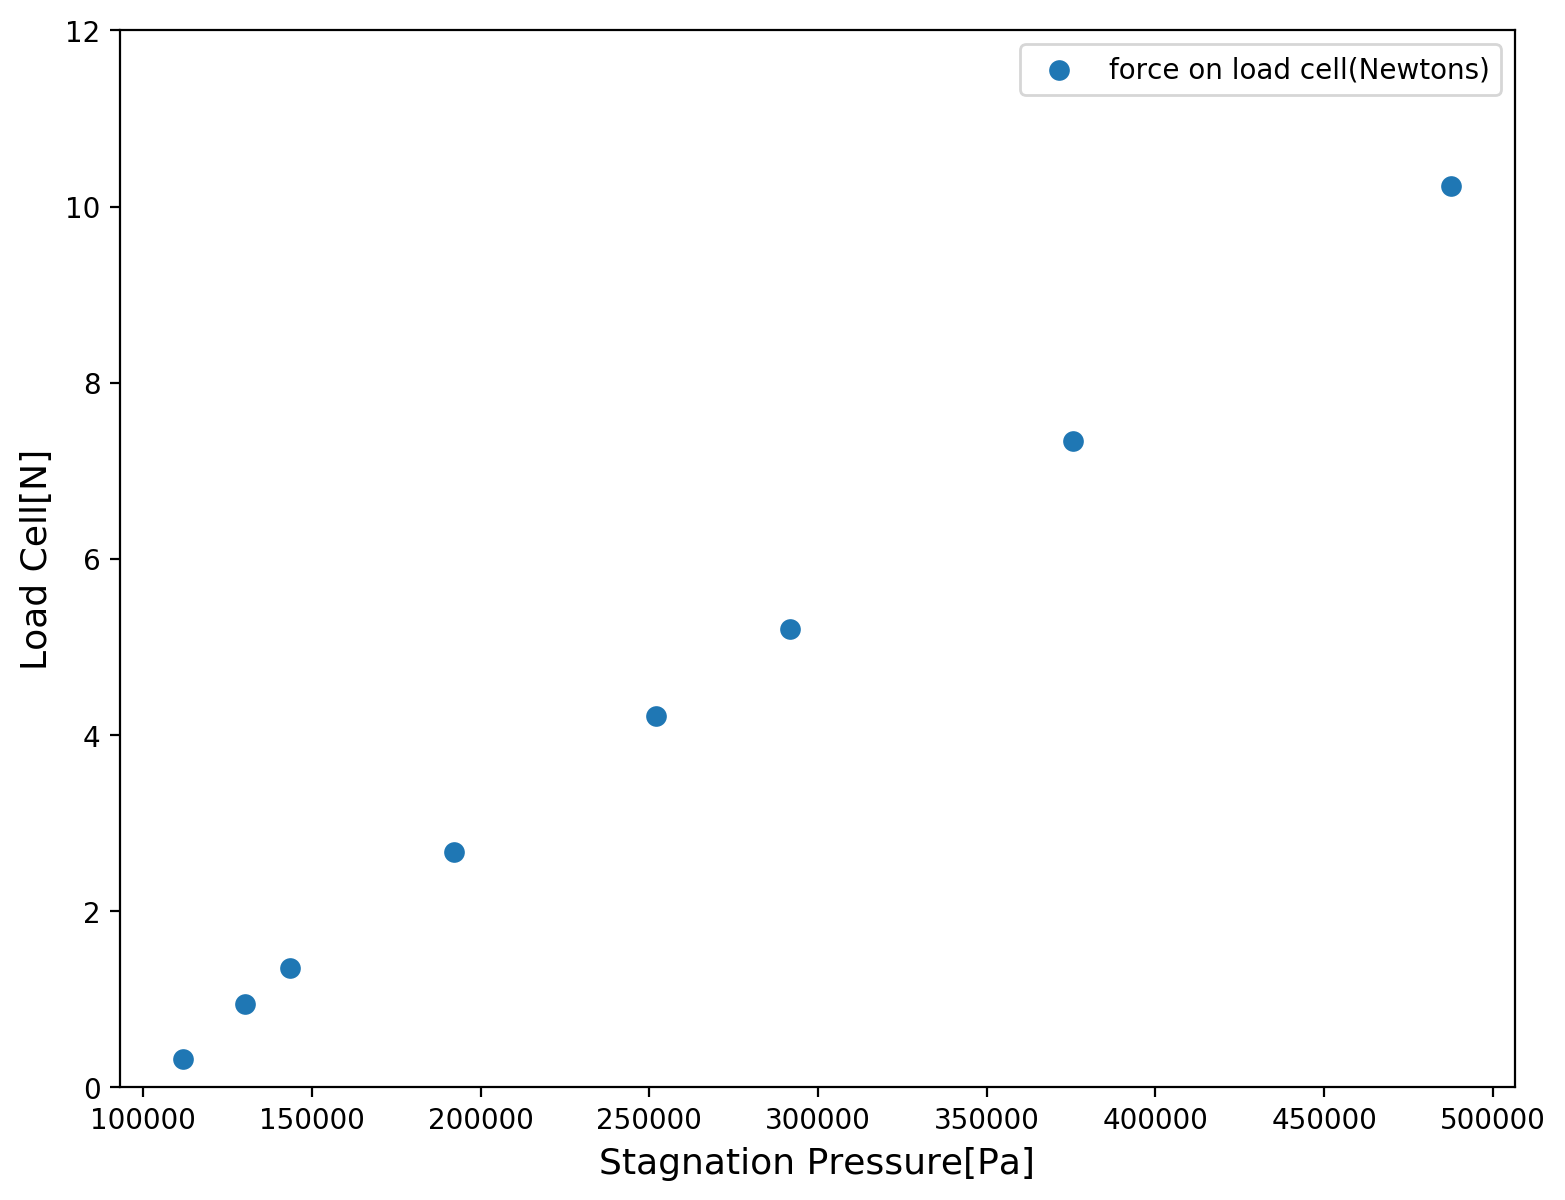

In [9]:
plt.figure(figsize=(9,7),dpi=200)
sns.scatterplot(x='Stagnation Pressure[Pa]',y='Load Cell[N]',data=df,linewidth=1.5,s=80,label='force on load cell(Newtons)')
plt.ylabel('Load Cell[N]',fontsize=13)
plt.xlabel('Stagnation Pressure[Pa]',fontsize=13)
plt.legend()
plt.ylim(0,12);
plt.savefig('loadcell.png')

#### The force exerted on the load cell has a positive and approximately linear correlation with increasing stagnation pressure.

## Task 2

$\frac{P_{0}}{P}=\left(1+\frac{\gamma-1}{2} M^{2}\right)^{\gamma /(\gamma-1)}$

In [10]:
gamma=1.4
M_sqaured = ((df['Stagnation Pressure[Pa]']/df['Absolute Static Pressure[Pa]'])**((gamma-1)/gamma) -1)/((gamma-1)/2)

In [11]:
M_isentropic = np.sqrt(M_sqaured)

In [12]:
df['M_isentropic']=M_isentropic

In [13]:
P0_choked = 101325/ 0.52828178 #compressible flow calculator
P0_choked

191801.04981095504

In [14]:
df['Stagnation Pressure[Pa]'].values[-1]

487735.322

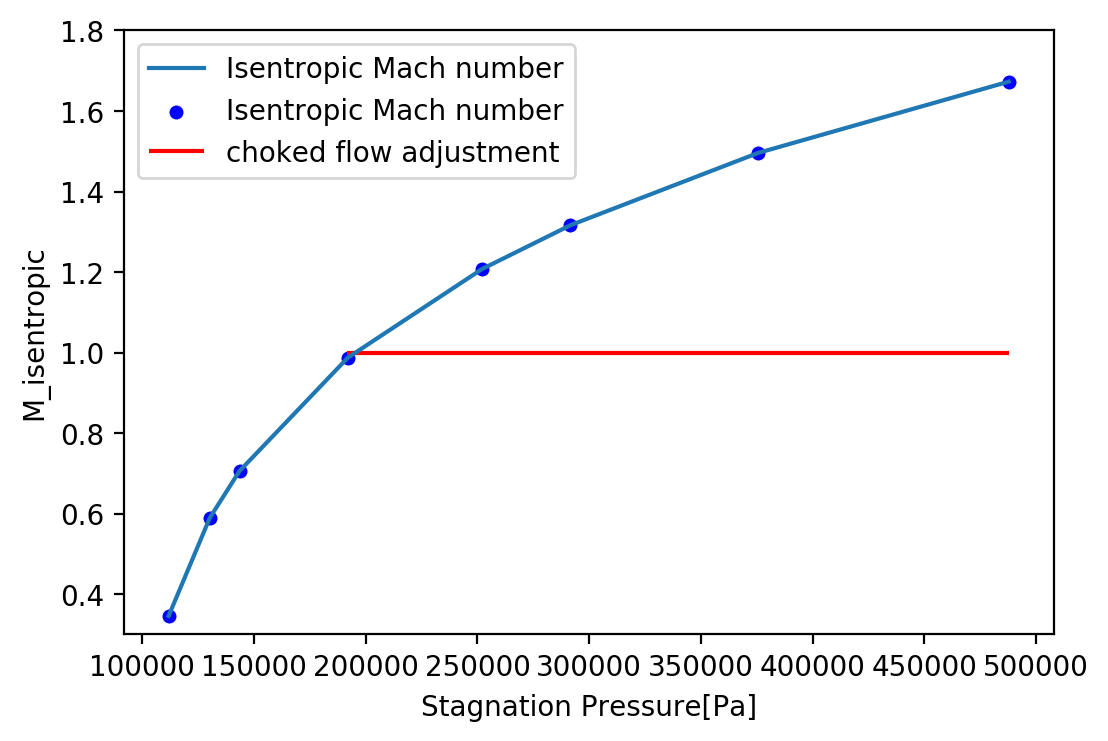

In [15]:
plt.figure(dpi=200);
sns.lineplot(x='Stagnation Pressure[Pa]',y='M_isentropic',data=df,label='Isentropic Mach number')
sns.scatterplot(x='Stagnation Pressure[Pa]',y='M_isentropic',data=df,color='b',s=30,label='Isentropic Mach number')
plt.hlines(y=1.0,xmin=P0_choked,xmax=df['Stagnation Pressure[Pa]'].values[-1],color='r',label='choked flow adjustment')
plt.legend();
plt.ylim(0.3,1.8);
plt.xlabel('Stagnation Pressure[Pa]');


## Task 3

In [16]:
rho = 1.225 # kg/m^3 at STP, one of our assumptions
V_exit_bernoulli = np.sqrt(2*(df['Stagnation Pressure[Pa]']-df['Absolute Static Pressure[Pa]'])/rho)

In [17]:
M_exit = np.sqrt(M_sqaured)
T0=295
T_exit = T0/(1+0.4/2*M_exit**2)
V_exit_isentropic = M_exit*np.sqrt(1.4*287*T_exit)

In [18]:
M_sqaured = ((df['Stagnation Pressure[Pa]']/df['Absolute Static Pressure[Pa]'])**((gamma-1)/gamma) -1)/((gamma-1)/2)

V_exit_adjusted = np.array([])
for i in df['Stagnation Pressure[Pa]'].values:
    
    if i<101325/0.52828178:
        
        M_exit = np.sqrt(np.array(M_sqaured))
        T_exit = T0/(1+0.4/2*M_exit**2)
        V_exit = np.array(M_exit*np.sqrt(1.4*287*T_exit))
        V_exit_adjusted=np.append(V_exit_adjusted,V_exit)
    
    

In [19]:
V_exit_adjusted=np.unique(V_exit_adjusted[:3])
T_exit_new = T0/(1+0.4/2)
V_exit_new = np.array(np.sqrt(1.4*287*T_exit_new))
V_exit_adjusted_complete = np.append(V_exit_adjusted,V_exit_new*np.ones(5))

In [20]:
V_exit_adjusted_complete

array([117.76230124, 196.28356067, 231.76920819, 314.28622835,
       314.28622835, 314.28622835, 314.28622835, 314.28622835])

In [21]:
V_exit_new

array(314.28622835)

In [22]:
V_exit_adjusted_complete

array([117.76230124, 196.28356067, 231.76920819, 314.28622835,
       314.28622835, 314.28622835, 314.28622835, 314.28622835])

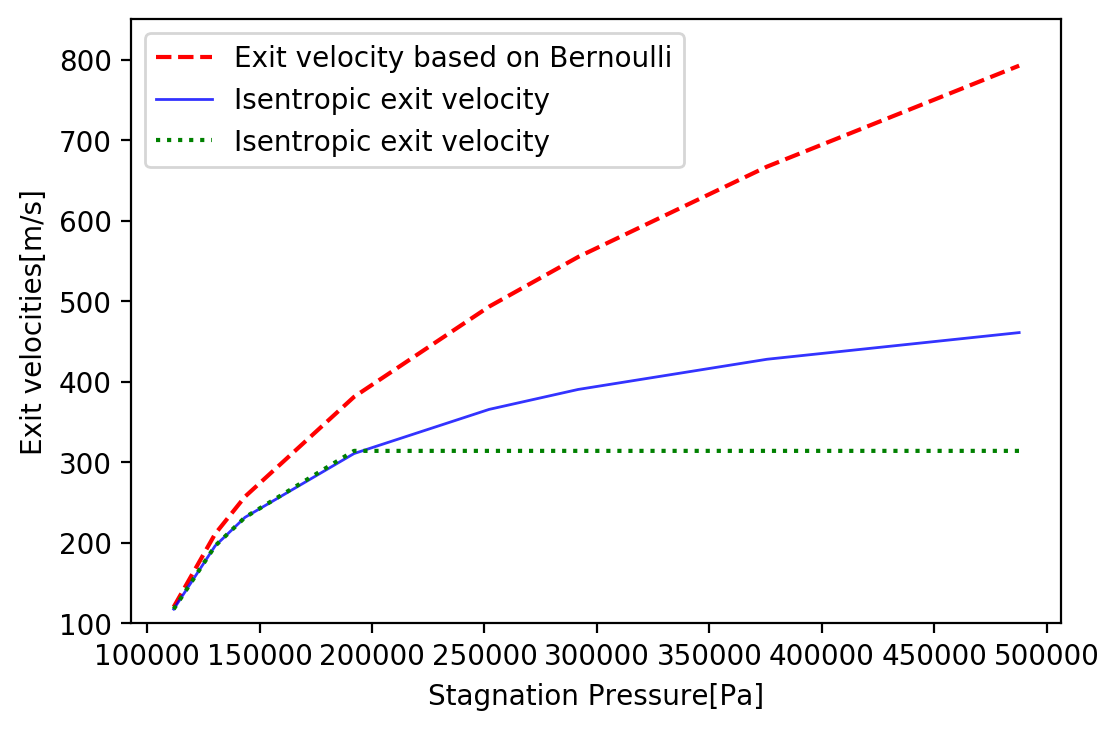

In [26]:
plt.figure(dpi=200);
plt.plot(df['Stagnation Pressure[Pa]'].values,V_exit_bernoulli,'--r',label='Exit velocity based on Bernoulli',linewidth=1.5)
plt.plot(df['Stagnation Pressure[Pa]'].values,V_exit_isentropic,'-b',label='Isentropic exit velocity',linewidth=1.0,alpha=0.8)
plt.plot(df['Stagnation Pressure[Pa]'].values,V_exit_adjusted_complete,':g',label='Isentropic exit velocity',linewidth=1.5)
plt.legend()
plt.ylabel('Exit velocities[m/s]')
plt.xlabel('Stagnation Pressure[Pa]')
plt.ylim(100,850);
plt.savefig('exit velocity')
